In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [134]:
def time_to_decimal(time_str):
    """Convert time-like strings (e.g., '19:50:00') to decimal (e.g., 19.50)."""
    if isinstance(time_str, str) and ':' in time_str:
        parts = time_str.split(':')
        # Use the first two parts (hours and minutes)
        try:
            return float(parts[0]) + float(parts[1]) / 100
        except ValueError:
            return np.nan
    return time_str

def findStroke(bore, disp, N):
    """
    find stroke lenghth (in inch).
    bore: diameter of cylinder in inch
    disp: engine displacement (size) in inch cubic
    N: number of cylinder
    """
    
    stroke = disp/(np.pi * (bore/2)**2 *N)
    return stroke

def findBore(stroke, disp, N):
    """
    find bore diameter (in inch).
    stroke: lenghth of stroke in inch
    disp: engine displacement (size) in inch cubic
    N: number of cylinder
    """

    bore = np.sqrt(4 * disp/(np.pi * stroke * N))
    return bore

# Alur Kerja AI
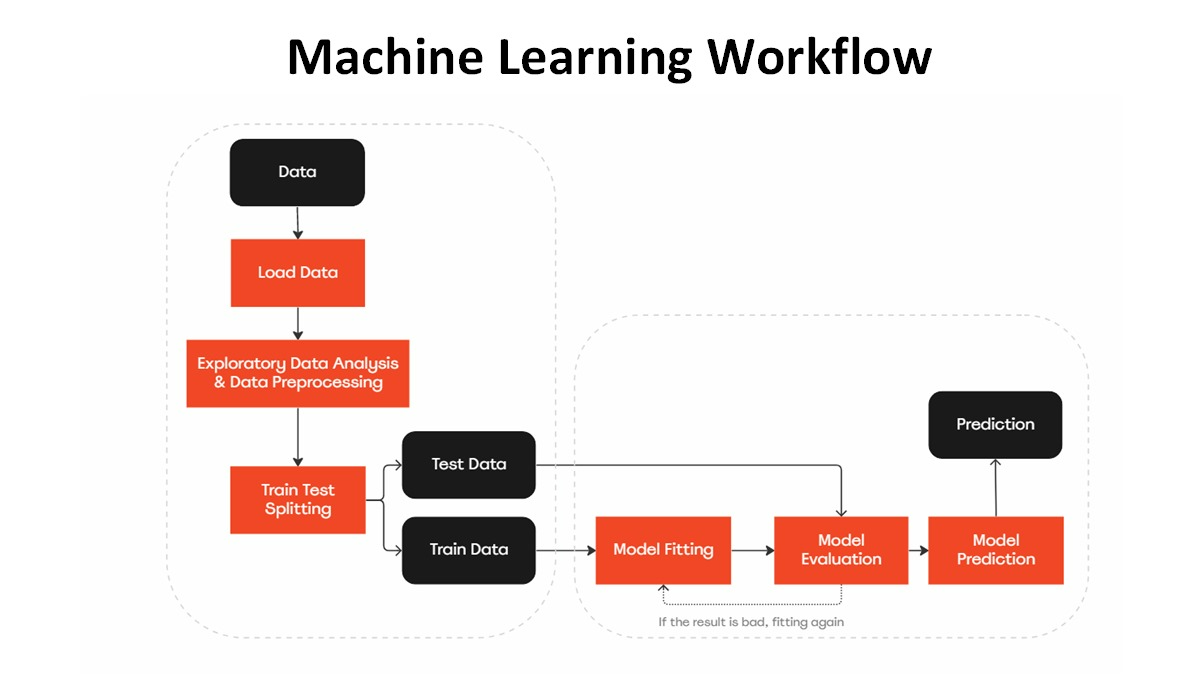

In [135]:
datasets = pd.read_csv(r"../Datasets/AIK dataset 1.csv")
datasets.head(10)

,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64:10:00,...,130,mpfi,3:47,0.130555556,9:00,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64:10:00,...,130,mpfi,3:47,0.130555556,9:00,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94:50:00,171:20:00,65:50:00,...,152,mpfi,0.130555556,3:47,9:00,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66:20:00,...,109,mpfi,3:19,3:40,10:00,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99:40:00,176.60,66:40:00,...,136,mpfi,3:19,3:40,8:00,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.80,177:30:00,66:30:00,...,136,mpfi,3:19,3:40,8:50,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71:40:00,...,136,mpfi,3:19,3:40,8:50,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71:40:00,...,136,mpfi,3:19,3:40,8:50,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.80,192.70,71:40:00,...,131,mpfi,3:13,3:40,8:30,140,5500,17,20,23875
9,audi,gas,turbo,two,hatchback,4wd,front,99:50:00,178:20:00,67.90,...,131,mpfi,3:13,3:40,7:00,160,5500,16,22,?


# Pembersihan data dan penyelarasan tipe variabel field

agar data siap digunakan, dilakukan pembersihan dan penyelarasan tipe data dalam tiap field

In [136]:
# Replace '?' with NaN
datasets_cleaned = datasets.replace("?", np.nan)

# Drop rows with NaN values
datasets_cleaned = datasets_cleaned.dropna()

# Display the cleaned dataset
datasets_cleaned.head(10)


,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64:10:00,...,130,mpfi,3:47,0.130555556,9:00,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64:10:00,...,130,mpfi,3:47,0.130555556,9:00,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94:50:00,171:20:00,65:50:00,...,152,mpfi,0.130555556,3:47,9:00,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66:20:00,...,109,mpfi,3:19,3:40,10:00,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99:40:00,176.60,66:40:00,...,136,mpfi,3:19,3:40,8:00,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.80,177:30:00,66:30:00,...,136,mpfi,3:19,3:40,8:50,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71:40:00,...,136,mpfi,3:19,3:40,8:50,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71:40:00,...,136,mpfi,3:19,3:40,8:50,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.80,192.70,71:40:00,...,131,mpfi,3:13,3:40,8:30,140,5500,17,20,23875
10,bmw,gas,std,two,sedan,rwd,front,101:20:00,176.80,64.80,...,108,mpfi,3:50,0.138888889,0.388888889,101,5800,23,29,16430


cek apakah dataset sudah dibersihkan dari missing value

In [150]:
print(len(datasets_cleaned["brand"]), len(datasets["brand"]))

193 205


In [138]:
print(datasets_cleaned.columns.tolist())

['brand', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


menyelaraskan tipe data pada field

In [139]:
time_like_columns = ['wheel-base', 'length', 'width', 'bore', 'height', 'stroke', 'compression-ratio']

for col in time_like_columns:
    datasets_cleaned[col] = datasets_cleaned[col].apply(time_to_decimal)

datasets_cleaned.head(10)

,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.1,...,130,mpfi,3.47,0.130555556,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.1,...,130,mpfi,3.47,0.130555556,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,0.130555556,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.60,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.80,177.3,66.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.80,192.70,71.4,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,bmw,gas,std,two,sedan,rwd,front,101.2,176.80,64.80,...,108,mpfi,3.5,0.138888889,0.388888889,101,5800,23,29,16430


In [140]:
number_dict = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'ten': 10,'eleven': 11, 'twelve': 12}
datasets_cleaned['num-of-cylinders'] = (datasets_cleaned['num-of-cylinders'].replace(number_dict).astype('int64'))
datasets_cleaned[['engine-size','num-of-cylinders', 'bore', 'stroke', 'height']].head(10)

C:\Users\ricky\AppData\Local\Temp\ipykernel_17064\3410662700.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datasets_cleaned['num-of-cylinders'] = (datasets_cleaned['num-of-cylinders'].replace(number_dict).astype('int64'))


,engine-size,num-of-cylinders,bore,stroke,height
0,130,4,3.47,0.130555556,48.80
1,130,4,3.47,0.130555556,48.80
2,152,6,0.130555556,3.47,52.4
3,109,4,3.19,3.4,54.3
4,136,5,3.19,3.4,54.3
5,136,5,3.19,3.4,53.1
6,136,5,3.19,3.4,55.70
7,136,5,3.19,3.4,55.70
8,131,5,3.13,3.4,55.90
10,108,4,3.5,0.138888889,54.3


In [141]:
for index, row in datasets_cleaned.iterrows():
    bore = float(row['bore'])
    stroke = float(row['stroke'])
    engine_size = float(row['engine-size'])
    num_cylinders = float(row['num-of-cylinders'])

    # Check conditions and update values as needed
    if not (bore < 1 and stroke < 1):  # Both values should not be less than 1
        if bore < 1:  # Fix 'bore' if it's less than 1
            datasets_cleaned.at[index, 'bore'] = findBore(stroke, engine_size, num_cylinders)
        elif stroke < 1:  # Fix 'stroke' if it's less than 1
            datasets_cleaned.at[index, 'stroke'] = findStroke(bore, engine_size, num_cylinders)

# Display the first 10 rows of selected fields
datasets_cleaned[['engine-size', 'num-of-cylinders', 'bore', 'stroke', 'compression-ratio']].head(10)

,engine-size,num-of-cylinders,bore,stroke,compression-ratio
0,130,4,3.47,3.436644,9.0
1,130,4,3.47,3.436644,9.0
2,152,6,3.048853,3.47,9.0
3,109,4,3.19,3.4,10.0
4,136,5,3.19,3.4,8.0
5,136,5,3.19,3.4,8.5
6,136,5,3.19,3.4,8.5
7,136,5,3.19,3.4,8.5
8,131,5,3.13,3.4,8.3
10,108,4,3.5,2.806324,0.388888889


In [142]:
datasets_cleaned['engine-size'] = datasets_cleaned['engine-size'].astype(float)
datasets_cleaned['num-of-cylinders'] = datasets_cleaned['num-of-cylinders'].astype(float)
datasets_cleaned['bore'] = datasets_cleaned['bore'].astype(float)
datasets_cleaned['stroke'] = datasets_cleaned['stroke'].astype(float)

# Calculate clearance volume per cylinder
try:
    # Precompute reused terms
    cylinder_area = np.pi * (datasets_cleaned['bore'] / 2)**2
    total_volume = datasets_cleaned['engine-size']
    num_cylinders = datasets_cleaned['num-of-cylinders']

    # Calculate the clearance volume
    datasets_cleaned['clearance-volume-per-cylinder'] = (
        (total_volume - num_cylinders * cylinder_area * datasets_cleaned['stroke']) / num_cylinders
    )

    # Display the first 10 rows of selected columns
    print(
        datasets_cleaned[
            ['engine-size', 'num-of-cylinders', 'bore', 'stroke', 'compression-ratio', 'clearance-volume-per-cylinder']
        ].head(10)
    )
except Exception as e:
    print(f"An error occurred during calculation: {e}")

    engine-size  num-of-cylinders      bore    stroke compression-ratio  \
0         130.0               4.0  3.470000  3.436644               9.0   
1         130.0               4.0  3.470000  3.436644               9.0   
2         152.0               6.0  3.048853  3.470000               9.0   
3         109.0               4.0  3.190000  3.400000              10.0   
4         136.0               5.0  3.190000  3.400000               8.0   
5         136.0               5.0  3.190000  3.400000               8.5   
6         136.0               5.0  3.190000  3.400000               8.5   
7         136.0               5.0  3.190000  3.400000               8.5   
8         131.0               5.0  3.130000  3.400000               8.3   
10        108.0               4.0  3.500000  2.806324       0.388888889   

    clearance-volume-per-cylinder  
0                    0.000000e+00  
1                    0.000000e+00  
2                   -4.736952e-15  
3                    7.621315e

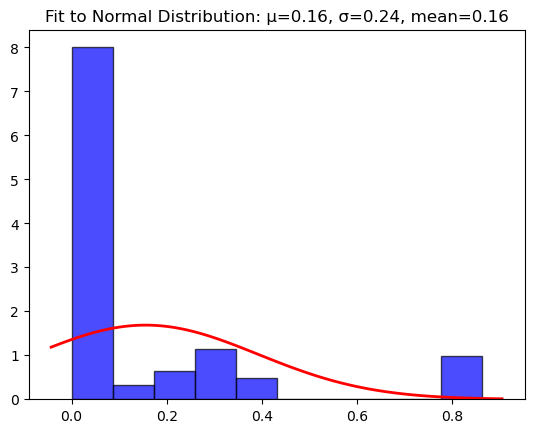

In [143]:
filtered_data = datasets_cleaned['clearance-volume-per-cylinder'].dropna()  # Drop NaN values
filtered_data = filtered_data[np.isfinite(filtered_data)]  # Drop infinite values

# Filter out values
filtered_data = filtered_data[(filtered_data < 1) & (filtered_data > 0)]

# Fit the data to a normal distribution
mu, std = norm.fit(filtered_data)

# mean
filtered_mean = np.mean(filtered_data)

# Plot the histogram and fitted curve
plt.hist(filtered_data, bins=10, density=True, color='blue', alpha=0.7, edgecolor='black')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# Add labels and title
plt.title(f"Fit to Normal Distribution: μ={mu:.2f}, σ={std:.2f}, mean={filtered_mean:.2f}")
plt.show()

merapikan field compression ratio

In [ ]:
for index, row in datasets_cleaned.iterrows():
    displacement = float(row['bore'])
    r = float(row['compression-ratio'])
    num_cylinders = float(row['num-of-cylinders'])

    # Check conditions and update values as needed
    if (r < 1):
        datasets_cleaned.at[index, 'compression-ratio'] = displacement/(num_cylinders* 0.16)
      

# Display the first 10 rows of selected fields
datasets_cleaned[['engine-size', 'num-of-cylinders', 'bore', 'stroke', 'compression-ratio']].head(10)

,engine-size,num-of-cylinders,bore,stroke,compression-ratio
0,130.0,4.0,3.470000,3.436644,9.0
1,130.0,4.0,3.470000,3.436644,9.0
2,152.0,6.0,3.048853,3.470000,9.0
3,109.0,4.0,3.190000,3.400000,10.0
4,136.0,5.0,3.190000,3.400000,8.0
5,136.0,5.0,3.190000,3.400000,8.5
6,136.0,5.0,3.190000,3.400000,8.5
7,136.0,5.0,3.190000,3.400000,8.5
8,131.0,5.0,3.130000,3.400000,8.3
10,108.0,4.0,3.500000,2.806324,5.46875


In [149]:
datasets_cleaned.to_csv('../Data/Raw/AIK_dataset_1_raw.csv', index=False)

In [74]:
stroke_length = 3.4 #inch
bore = 3.19 #inch
N = 4
displacement = stroke_length * np.pi * (bore/2)**2 * N
print(109-displacement)

0.30485259253667607
